## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results_df = mouse_metadata_df.merge(study_results_df,on="Mouse ID")

# Display the data table for preview
mouse_study_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Check the number of mice.
mouse_study_results_df["Mouse ID"].nunique()

249

In [4]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
x = mouse_study_results_df.duplicated(["Mouse ID", "Timepoint"])

#display a preview
mouse_study_results_df[x]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Drop any duplicate rows
mouse_study_results_df = mouse_study_results_df.drop_duplicates(["Mouse ID", "Timepoint"])

In [6]:
# Recheck the number of mice
mouse_study_results_df["Mouse ID"].nunique()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
#group the data by Drug Regimen
drug_treatment_group = mouse_study_results_df.groupby('Drug Regimen')

summary_statistics_df = drug_treatment_group.agg({'Tumor Volume (mm3)':['mean',
                                                                          'median',
                                                                          'var',
                                                                          'std',
                                                                          'sem']})

#rename the columns
summary_statistics_df = summary_statistics_df.rename(columns={'mean':'Mean',
                                                             'median':'Median',
                                                             'var':'Variance',
                                                             'std':'Standard Deviation',
                                                             'sem':'Standard Error of means',})
summary_statistics_df.head()

Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   

                                      
             Standard Error of means  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol                   0.492236  
Ketapril                    0.603860  
Naftisol                    0.596466

## Bar and Pie Charts

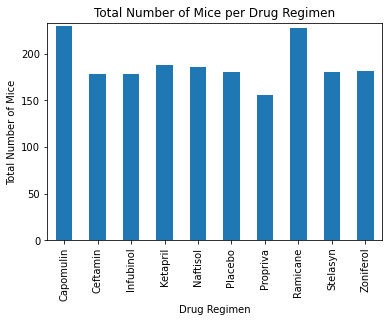

In [8]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen

#group the data by Drug Regimen and find the number of mice per drug regimen
mice_count_per_drug_series = drug_treatment_group['Mouse ID'].count()

#plot the bar char 
mice_count_per_drug_series.plot(kind="bar", title="Total Number of Mice per Drug Regimen")
plt.ylim(0, mice_count_per_drug_series.max()+3)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()


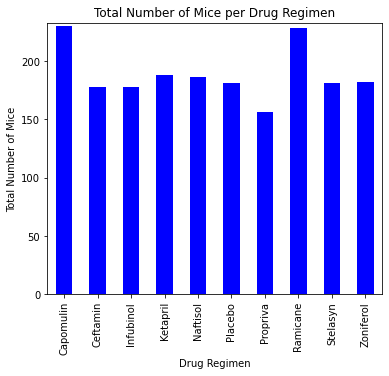

In [9]:
# Generate identical bar plot using pyplot instead of pandas.

#using the groupby object in previous cell, find the names of the drugs
drugs_series = mice_count_per_drug_series.index

# Set x axis
x_axis = np.arange(len(drugs_series))

#create the bar graph and set figure size to adjust for space
plt.figure(figsize=(6,5))
plt.bar(x_axis, mice_count_per_drug_series, color="b", align="center", width=.5)

# Create a list indicating where to write x labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs_series, rotation="vertical")

# Set x and y limits
plt.xlim(-.5, len(x_axis)-0.5)
plt.ylim(0, mice_count_per_drug_series.max()+3)

# Set a Title and labels
plt.title("Total Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.show()


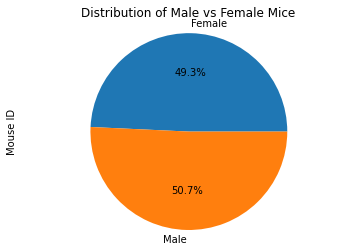

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#find the number of mice based on gender
mouse_gender_count =  mouse_study_results_df.groupby('Sex')['Mouse ID'].count()

#plot the pie chart and give it a title
mouse_gender_count.plot(kind="pie",autopct='%1.1f%%',)
plt.title("Distribution of Male vs Female Mice")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()


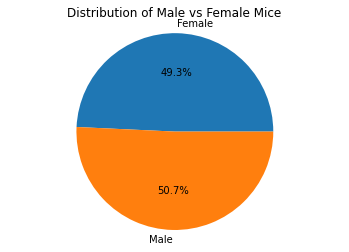

In [11]:
# Generate identical pie plot using pyplot

#find the labels for the pie chart
mouse_gender = mouse_gender_count.index

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mouse_gender_count, labels=mouse_gender, autopct="%1.1f%%")

# Create axes which are equal so we have a perfect circle
plt.title("Distribution of Male vs Female Mice")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse

#group the data by mouse ID and find the Max across all data points
max_timepoint = mouse_study_results_df.groupby('Mouse ID').max()
#print(max_timepoint)

#reset the index
max_timepoint = max_timepoint.reset_index() #gives an error that Mouse ID is not in index if I remove this line
#print(max_timepoint)

#retrieve the Mouse ID and max Timepoint in a dataframe
mouse_tumor_volume_df = max_timepoint[['Mouse ID','Timepoint']]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_tumor_volume_df = mouse_tumor_volume_df.merge(mouse_study_results_df,on=['Mouse ID','Timepoint'],how="left")
mouse_tumor_volume_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [13]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
#group the mice by Drug Regimen
mouse_drug_group = mouse_tumor_volume_df.groupby('Drug Regimen')

#for ezch drug in the list
for treatment in treatments:

    # add subset 
    
    #get the data for the drugs on the list
    treatment_group_df = mouse_drug_group.get_group(treatment)
    
    #append to the list the tumor volumes for the mice for each drug 
    tumor_vol_data.append(treatment_group_df['Tumor Volume (mm3)'])
    
    quartiles = treatment_group_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatment} is: {lowerq}")
    print(f"The upper quartile of {treatment} is: {upperq}")
    print(f"The interquartile range of {treatment} is: {iqr}")
    print(f"The the median of {treatment} is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print("-----------------------------------------------")

 

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
-----------------------------------------------
The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
-----------------------------------------------
The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
------------

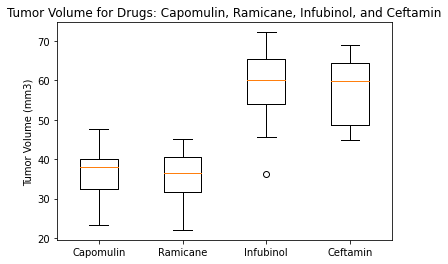

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Drugs: Capomulin, Ramicane, Infubinol, and Ceftamin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

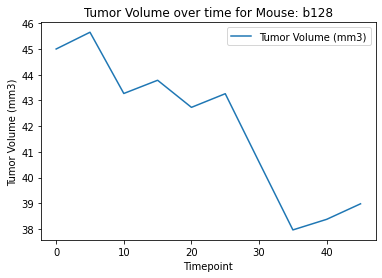

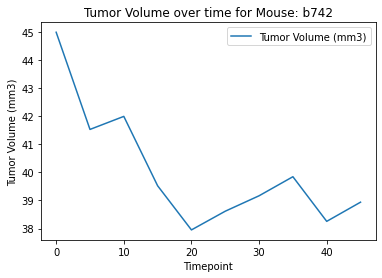

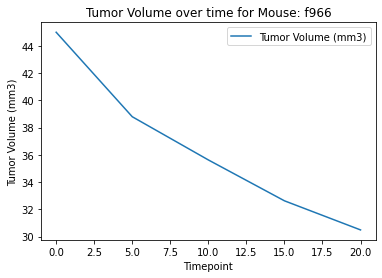

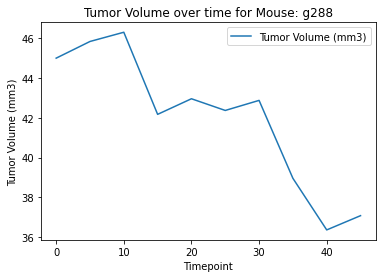

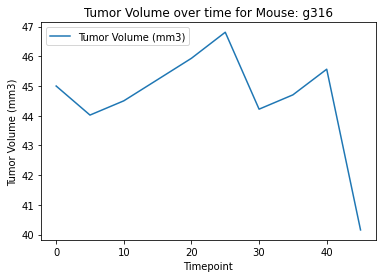

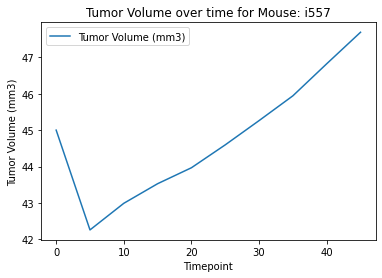

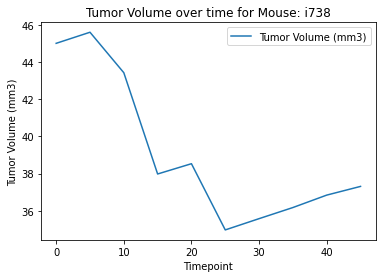

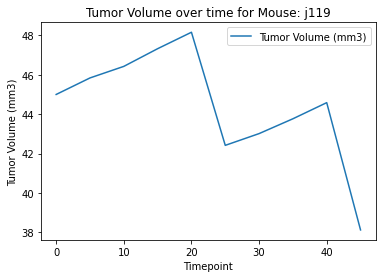

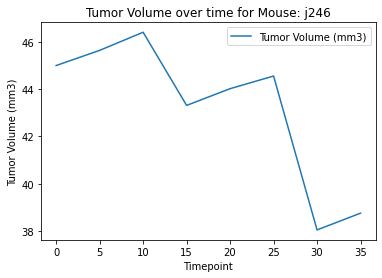

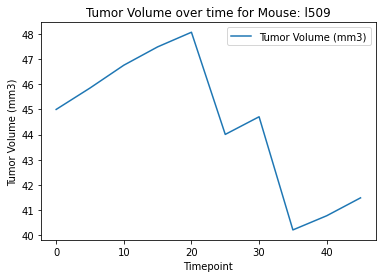

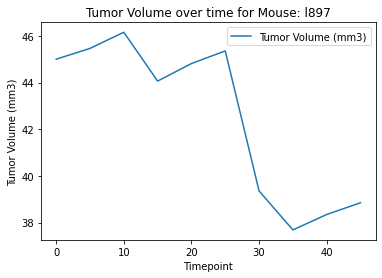

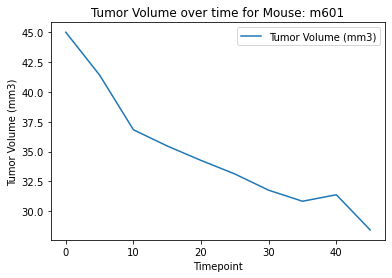

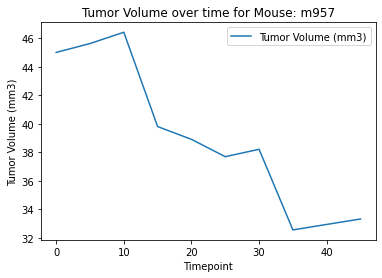

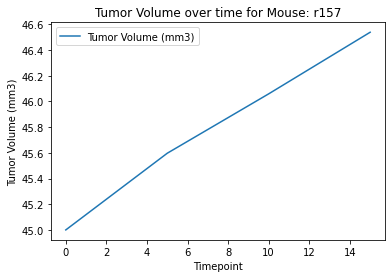

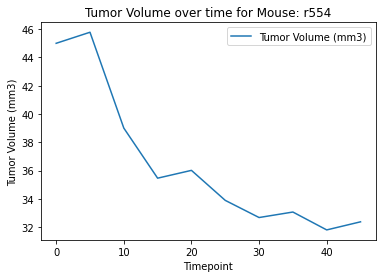

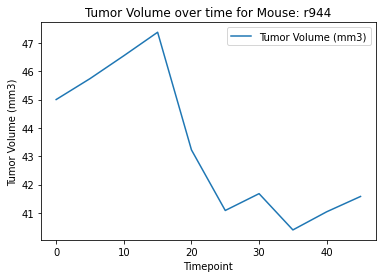

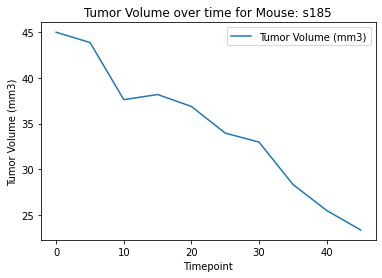

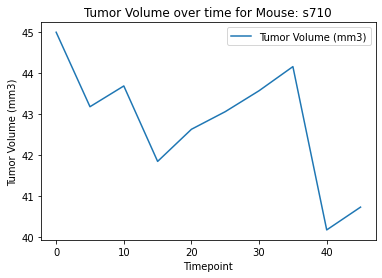

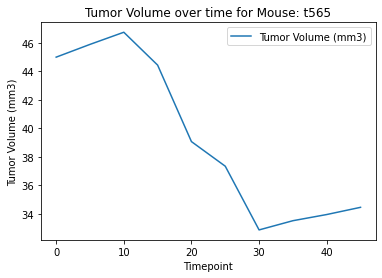

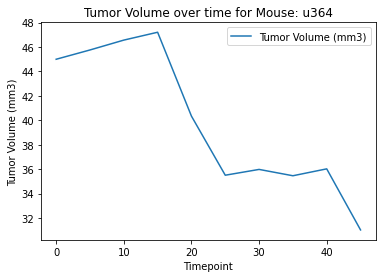

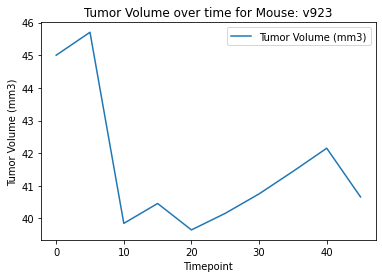

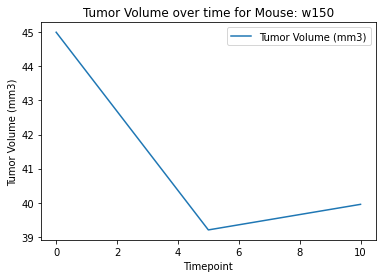

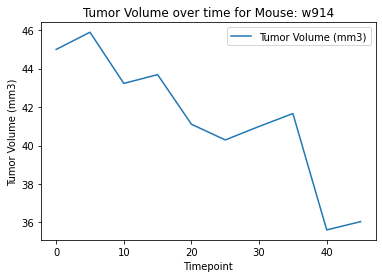

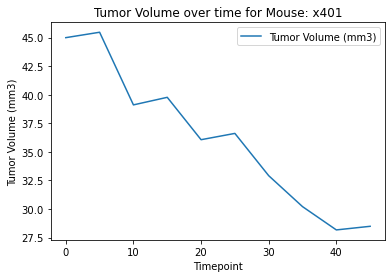

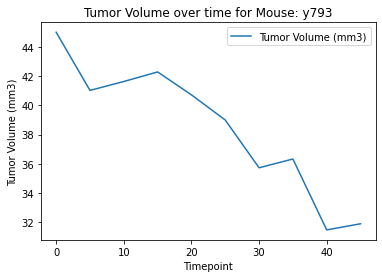

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

#find the group for Capomulin
Capomulin_treatment = drug_treatment_group.get_group('Capomulin')

#group the Capomulin_treatment data by Mouse ID
Capomulin_treatment_mousegroup = Capomulin_treatment.groupby('Mouse ID')

#fig, ax = plt.subplots()
#Capomulin_treatment.groupby('Mouse ID').plot(x='Timepoint',y='Tumor Volume (mm3)', ax=ax,legend=False)

#gett the Mouse IDs
Capomulin_treatment_mouse_list = Capomulin_treatment_mousegroup.indices

#for each mouse in the Capomulin regimen
for mouse_id in Capomulin_treatment_mouse_list:
    
    #plot the line chart of tumor volume over time for each mouse
    Capomulin_treatment_mousegroup.get_group(mouse_id).plot(x='Timepoint',y='Tumor Volume (mm3)')
    plt.title('Tumor Volume over time for Mouse: ' + mouse_id )
    plt.ylabel("Tumor Volume (mm3)")
    plt.show()


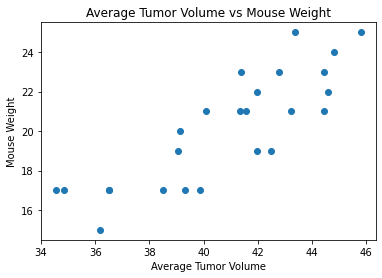

In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen
#find the average tumor voulume for mice under the Capomulin regimen
average_tumor_volume = Capomulin_treatment_mousegroup['Tumor Volume (mm3)'].mean()

#find the weight for mice under the Capomulin regimen
mouse_weight = Capomulin_treatment_mousegroup['Weight (g)'].mean()

#plot the scatter plot
plt.scatter(average_tumor_volume,mouse_weight)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


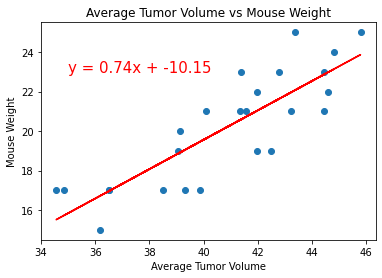

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#plot the scatter plot
plt.scatter(average_tumor_volume,mouse_weight)

#plot the linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_volume, mouse_weight)
regress_values = average_tumor_volume * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(average_tumor_volume,regress_values,"r-")
plt.annotate(line_eq,(35,23),fontsize=15,color="red")

#Set the title and axis labels   
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")
                                                      
#calculate the correlation coefficient
print(f"The r-squared is: {rvalue**2}")
plt.show()

# Observations and Insights